In [41]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


### 1. Business Understanding

### classify the Size_Categorie using SVM

### Month - month of the year: 'jan' to 'dec'
### Day     - day of the week: 'mon' to 'sun'
### FFMC  -	FFMC index from the FWI system: 18.7 to 96.20
### DMC   -	 DMC index from the FWI system: 1.1 to 291.3
### DC      -  DC index from the FWI system: 7.9 to 860.6
### ISI       -  ISI index from the FWI system: 0.0 to 56.10
### temp   -  temperature in Celsius degrees: 2.2 to 33.30
### RH      -  relative humidity in %: 15.0 to 100
### wind   -  wind speed in km/h: 0.40 to 9.40
### rain     -  outside rain in mm/m2 : 0.0 to 6.4
### Size_Categorie 	the burned area of the forest ( Small , Large)

In [2]:
forest_fries = pd.read_csv('forestfires.csv')
forest_fries

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest_fries1 = forest_fries.copy()
forest_fries1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
forest_fries1.shape

(517, 31)

In [6]:
forest_fries1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
forest_fries1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forest_fries1[forest_fries1.columns[0:11]].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### 2. Finding Correlation

In [11]:
corr = forest_fries1[forest_fries1.columns[0:11]].corr()

<AxesSubplot:>

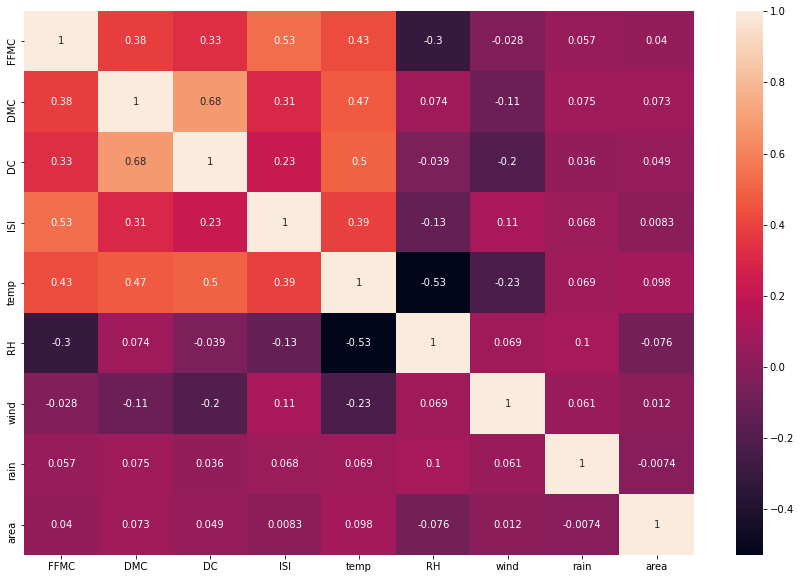

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

### Outlier Check

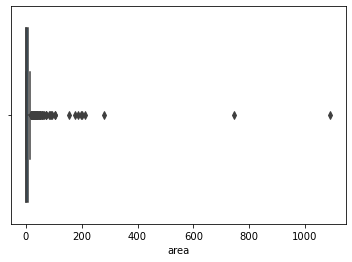

In [16]:
ax = sns.boxplot(forest_fries1['area']) # There are 3 Outlier instances in our data

Skew:12.846933533934868
Kurtosis:194.1407210942299


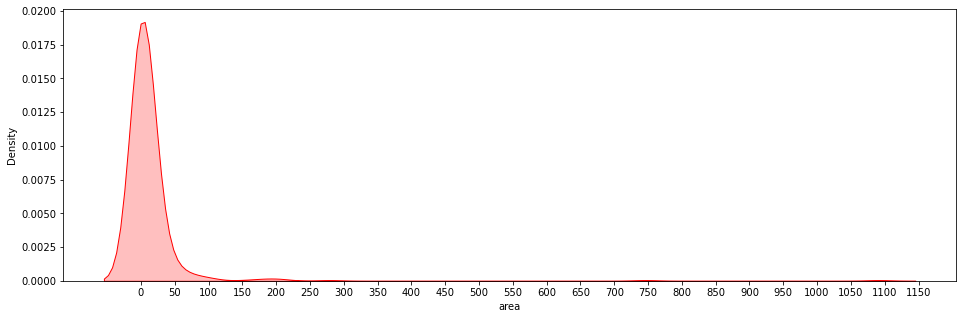

In [17]:
plt.rcParams["figure.figsize"]=10,5

plt.figure(figsize=(16,5))
print("Skew:{}".format(forest_fries1['area'].skew()))
print("Kurtosis:{}".format(forest_fries1['area'].kurtosis()))
ax=sns.kdeplot(forest_fries1['area'],shade=True,color='r')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### The Data is highly skewed and has large kurtosis value

### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [20]:
forestfries=forest_fries1[forest_fries1.columns[0:10]]
month_column = forestfries.select_dtypes(include='object').columns.tolist()

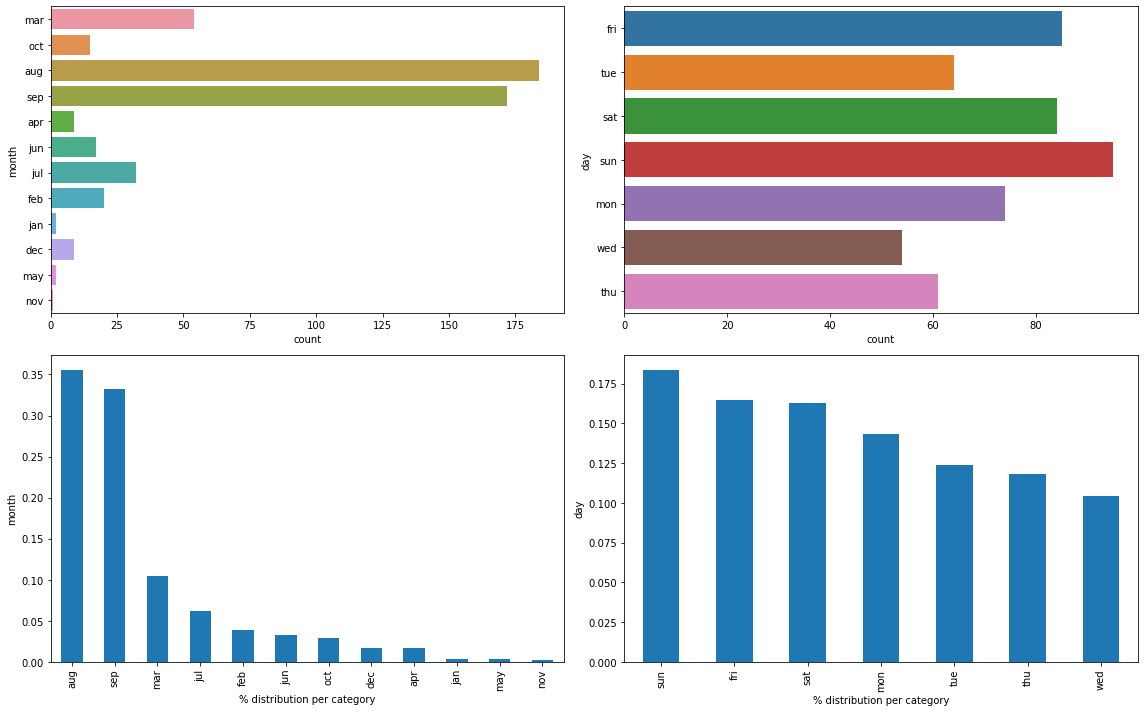

In [22]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forestfries,y=col)
    plt.subplot(2,2,i+2)
    forest_fries1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

### Majority of the fire occured in the month Aug and Sep
### The most cases are recorded on Friday and Sunday  

In [26]:
num_columns = forestfries.select_dtypes(exclude='object').columns.tolist()

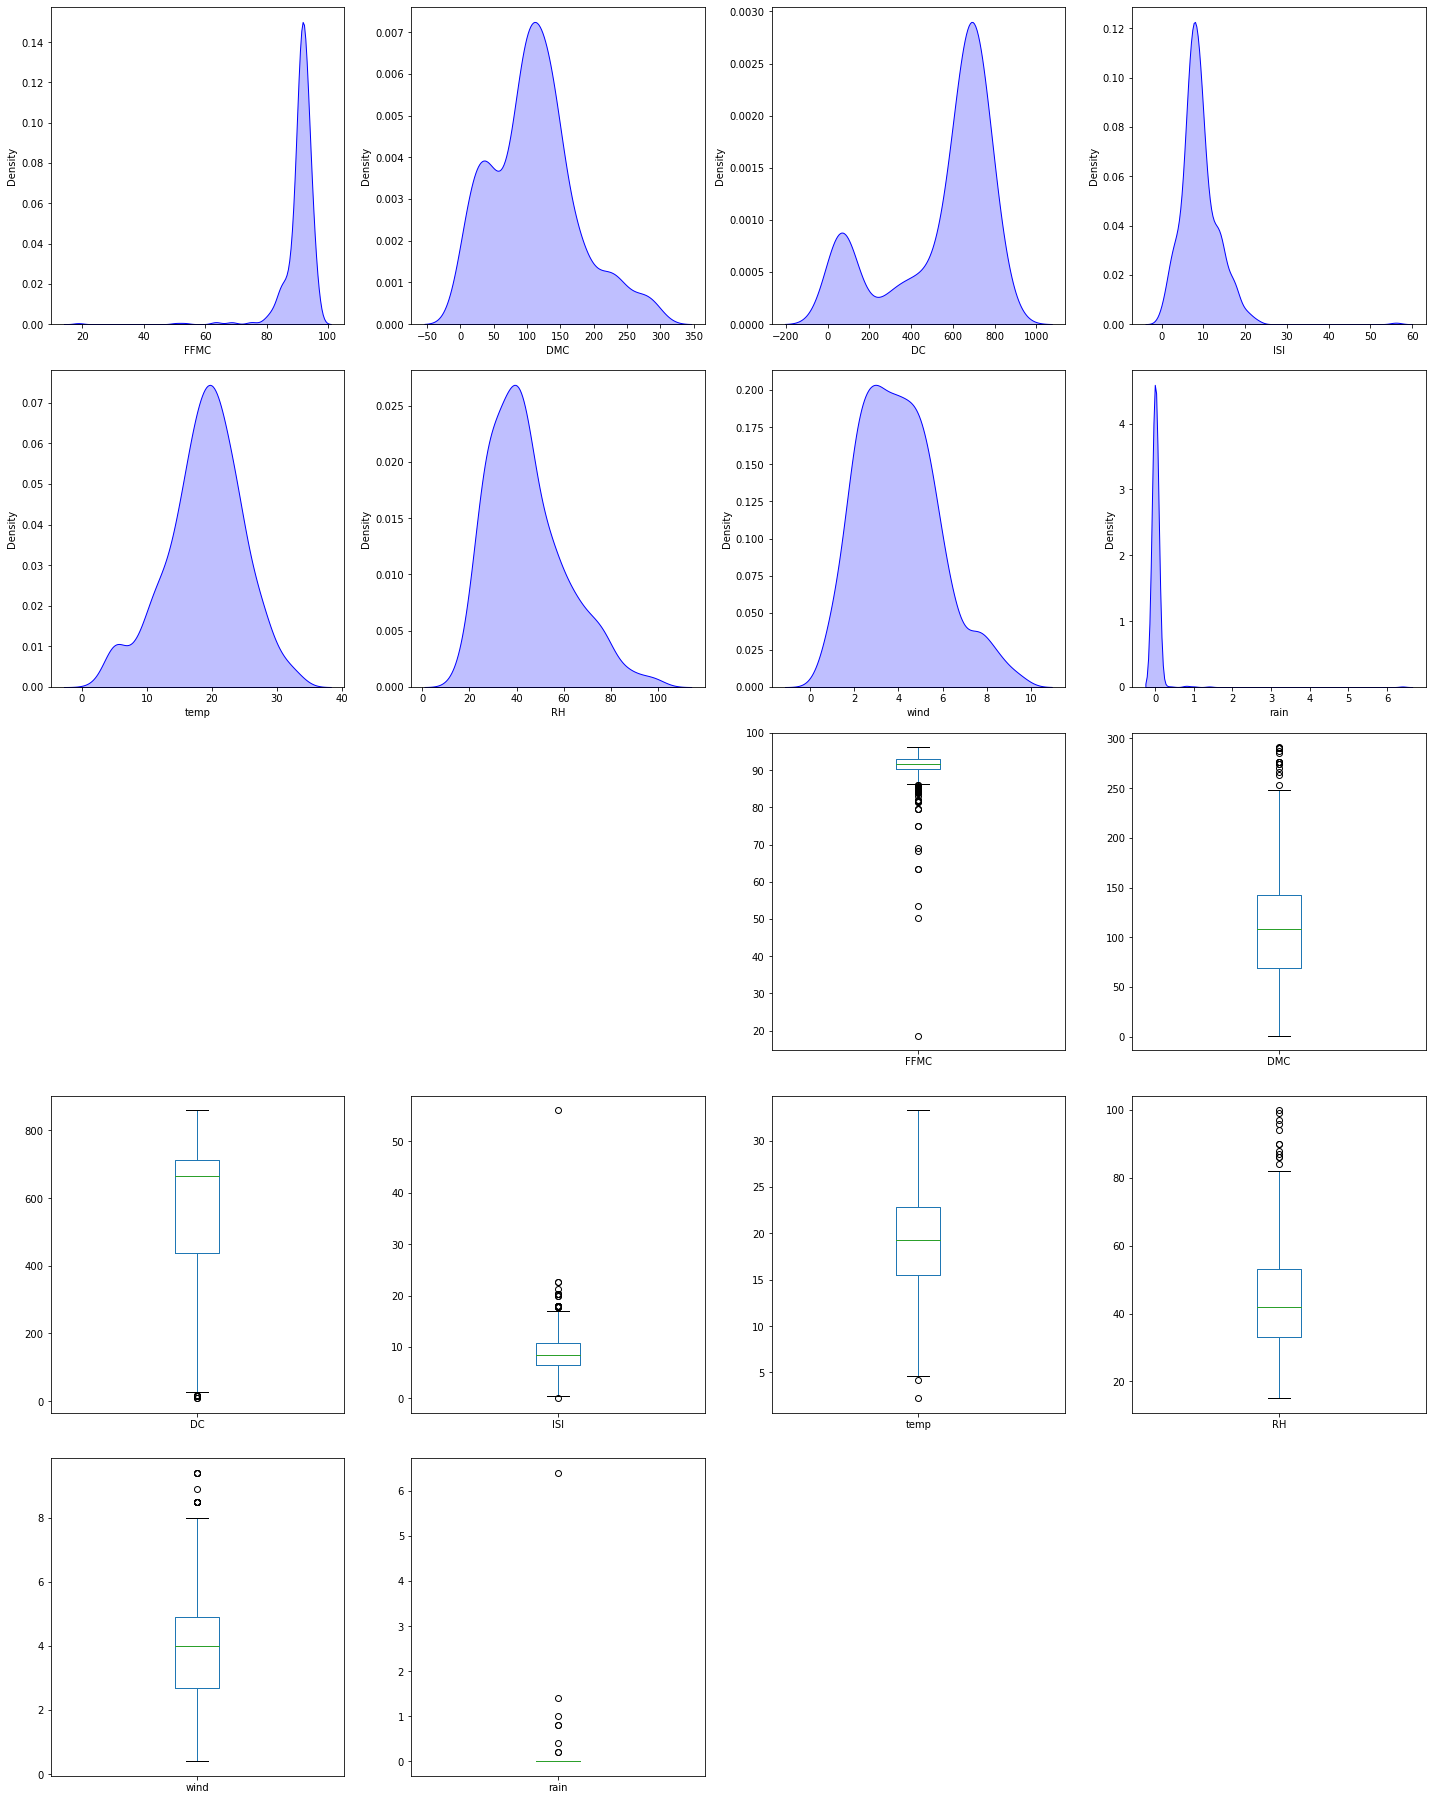

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [30]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest_fries[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    forest_fries[col].plot.box()
plt.tight_layout()
plt.show()
num_data = forest_fries[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### 3. Support Vector Machines

In [43]:
X = forest_fries1.iloc[:,2:30]
y = forest_fries1.iloc[:,30]

In [50]:
mapping = {'small':1,'large':2}

In [51]:
y=y.replace(mapping)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

### 3.1 Linear

In [54]:
model_linear = SVC(kernel="linear")
model_linear.fit(X_train,y_train)
pred_test_linear=model_linear.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_linear))

Accuracy: 0.9807692307692307


### 3.2 Poly

In [55]:
model_poly = SVC(kernel="poly")
model_poly.fit(X_train,y_train)
pred_test_poly=model_poly.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_poly))

Accuracy: 0.7692307692307693


### 3.3 RBF

In [56]:
model_rbf = SVC(kernel="rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf=model_rbf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_rbf))

Accuracy: 0.7692307692307693


### 3.4 Sigmoid

In [57]:
model_sigmoid = SVC(kernel="sigmoid")
model_sigmoid.fit(X_train,y_train)
pred_test_sigmoid=model_sigmoid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_sigmoid))

Accuracy: 0.7307692307692307


### 4 - Conclusion

### Linear Model gives the best accuracy of 98%